In [1]:
pip install keras==2.12.0

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Import Libraries
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import seaborn as sns
import matplotlib.pyplot as plt
import keras
import tensorflow
from keras.layers import Dense, LSTM, Dropout
from keras import optimizers

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor


# Import dataset

In [3]:
gt = pd.read_csv("gas_turbines.csv")
gt

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


# EDA

In [4]:
gt.shape

(15039, 11)

In [5]:
gt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [6]:
gt.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [7]:
gt.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [8]:
gt[gt.duplicated()].shape

(0, 11)

# Correlation

correlation
A correlational research design investigates relationships between variables without the researcher controlling or manipulating any of them. A correlation reflects the strength and/or direction of the relationship between two (or more) variables.The direction of a correlation can be either positive or negative.

the correlation coefficient is measured on a scale that varies from +1 through 0 to -1.
Complete correlation between two variables is expressed by either +1 or -1.
When one variable increases as the other increases the correlation is positive.
When one decreases as the other increases it is negative.

In [9]:
gt.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


# Data Visualization

<AxesSubplot:>

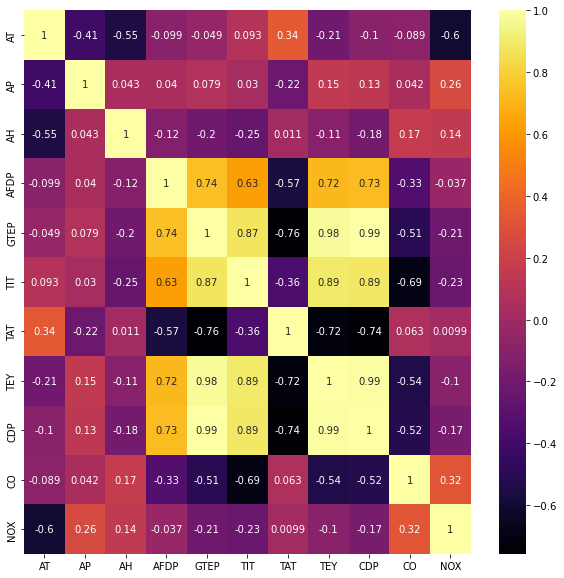

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(gt.corr(),annot=True,cmap="inferno")

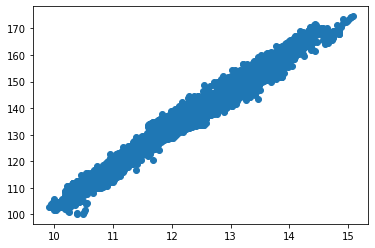

In [11]:
import matplotlib.pyplot as plt
plt.scatter(x="CDP",y="TEY",data=gt)#which is linerly co-related

<AxesSubplot:>

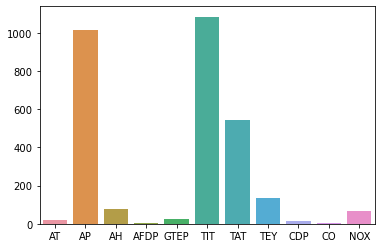

In [12]:
sns.barplot(data=gt)

(array([ 247., 2671.,  474.,  528., 7145.,  462.,  989., 1215., 1160.,
         148.]),
 array([100.17 , 107.614, 115.058, 122.502, 129.946, 137.39 , 144.834,
        152.278, 159.722, 167.166, 174.61 ]),
 <BarContainer object of 10 artists>)

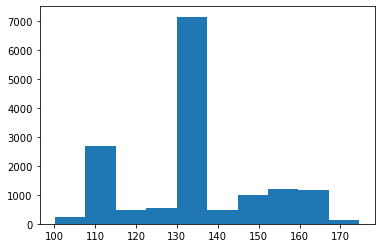

In [13]:
plt.hist(gt['TEY'])

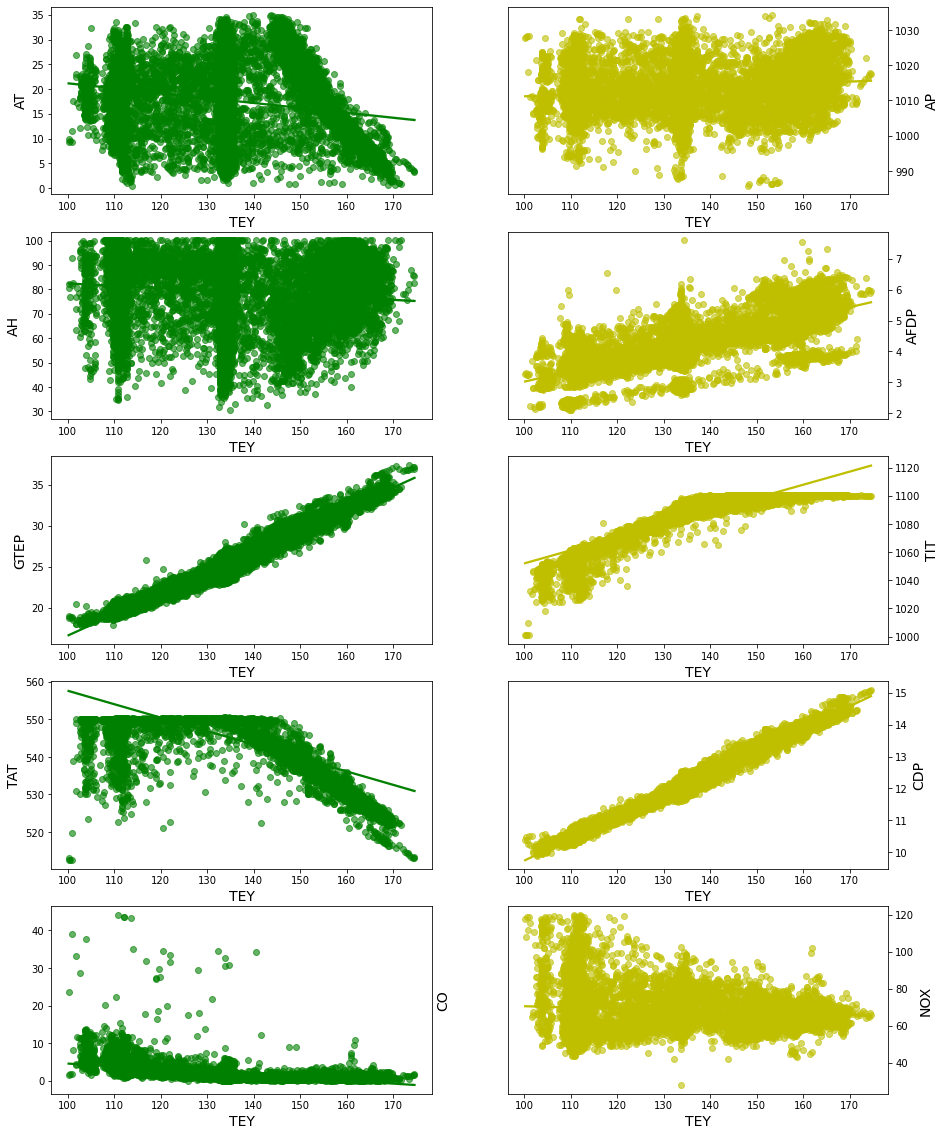

In [14]:
f, axes = plt.subplots(5,2, figsize=(15,20))

sns.regplot(x = 'TEY', y = 'AT', data = gt, ax = axes[0,0], color = 'g', scatter_kws={'alpha':0.6})
axes[0,0].set_xlabel('TEY', fontsize = 14)
axes[0,0].set_ylabel('AT', fontsize=14)
axes[0,0].yaxis.tick_left()


sns.regplot(x = 'TEY', y = 'AP', data = gt, ax = axes[0,1], color = 'y',scatter_kws={'alpha':0.6})
axes[0,1].set_xlabel('TEY', fontsize = 14)
axes[0,1].set_ylabel('AP', fontsize=14)
axes[0,1].yaxis.set_label_position("right")
axes[0,1].yaxis.tick_right()


sns.regplot(x = 'TEY', y = 'AH', data = gt, ax = axes[1,0], color = 'g',scatter_kws={'alpha':0.6})
axes[1,0].set_xlabel('TEY', fontsize = 14)
axes[1,0].set_ylabel('AH', fontsize=14)
axes[1,0].yaxis.tick_left()


sns.regplot(x = 'TEY', y = 'AFDP', data = gt, ax = axes[1,1], color = 'y',scatter_kws={'alpha':0.6})
axes[1,1].set_xlabel('TEY', fontsize = 14)
axes[1,1].set_ylabel('AFDP', fontsize=14)
axes[1,1].yaxis.set_label_position("right")
axes[1,1].yaxis.tick_right()


sns.regplot(x = 'TEY', y = 'GTEP', data = gt, ax = axes[2,0], color = 'g',scatter_kws={'alpha':0.6})
axes[2,0].set_xlabel('TEY', fontsize = 14)
axes[2,0].set_ylabel('GTEP', fontsize=14)
axes[2,0].yaxis.tick_left()


sns.regplot(x = 'TEY', y = 'TIT', data = gt, ax = axes[2,1], color = 'y',scatter_kws={'alpha':0.6})
axes[2,1].set_xlabel('TEY', fontsize = 14)
axes[2,1].set_ylabel('TIT', fontsize=14)
axes[2,1].yaxis.set_label_position("right")
axes[2,1].yaxis.tick_right()


sns.regplot(x = 'TEY', y = 'TAT', data = gt, ax = axes[3,0], color = 'g',scatter_kws={'alpha':0.6})
axes[3,0].set_xlabel('TEY', fontsize = 14)
axes[3,0].set_ylabel('TAT', fontsize=14)
axes[3,0].yaxis.tick_left()


sns.regplot(x = 'TEY', y = 'CDP', data = gt, ax = axes[3,1], color = 'y',scatter_kws={'alpha':0.6})
axes[3,1].set_xlabel('TEY', fontsize = 14)
axes[3,1].set_ylabel('CDP', fontsize=14)
axes[3,1].yaxis.set_label_position("right")
axes[3,1].yaxis.tick_right()

sns.regplot(x = 'TEY', y = 'CO', data = gt, ax = axes[4,0], color = 'g',scatter_kws={'alpha':0.6})
axes[4,0].set_xlabel('TEY', fontsize = 14)
axes[4,0].set_ylabel('CO', fontsize=14)
axes[4,0].yaxis.set_label_position("right")
axes[4,0].yaxis.tick_left()

sns.regplot(x = 'TEY', y = 'NOX', data = gt, ax = axes[4,1], color = 'y',scatter_kws={'alpha':0.6})
axes[4,1].set_xlabel('TEY', fontsize = 14)
axes[4,1].set_ylabel('NOX', fontsize=14)
axes[4,1].yaxis.set_label_position("right")
axes[4,1].yaxis.tick_right()

plt.show()

# Data Preprocessing

In [15]:
X=gt.drop('TEY',axis=1)
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [16]:
Y=gt['TEY']
Y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [17]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)
x_scaled

array([[-1.4397781 , -0.82664395,  1.28143632, ..., -1.35733078,
         0.53201195,  1.3878449 ],
       [-1.44960109, -0.74864748,  1.30456402, ..., -1.36367619,
         0.56873344,  1.39300237],
       [-1.43472138, -0.68625031,  1.21908576, ..., -1.36095673,
         0.5529378 ,  1.36358566],
       ...,
       [-1.38626659, -1.07623263,  1.47697056, ..., -1.46792219,
         2.69592467,  2.17006209],
       [-1.42042259, -0.99823616,  1.44159024, ..., -1.42259784,
         1.9246834 ,  2.391165  ],
       [-1.43073409, -0.93583899,  1.33465179, ..., -1.37727349,
         1.35415028,  2.32153907]])

In [18]:
scaled_gasturbines_data=pd.DataFrame(x_scaled,columns=X.columns)
scaled_gasturbines_data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.350985,0.574179,1.348591
...,...,...,...,...,...,...,...,...,...,...
15034,-1.153182,-1.185428,1.401860,-0.865850,-1.498657,-2.063184,0.103453,-1.543161,1.145792,1.085751
15035,-1.303986,-1.138630,1.447753,-0.913470,-1.438759,-2.268905,-0.276638,-1.513247,1.293578,1.119943
15036,-1.386267,-1.076233,1.476971,-0.951488,-1.410967,-2.789257,-1.026650,-1.467922,2.695925,2.170062
15037,-1.420423,-0.998236,1.441590,-0.988848,-1.447624,-2.456474,-0.528337,-1.422598,1.924683,2.391165


In [19]:
X_transformed=scaled_gasturbines_data
X_transformed

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.350985,0.574179,1.348591
...,...,...,...,...,...,...,...,...,...,...
15034,-1.153182,-1.185428,1.401860,-0.865850,-1.498657,-2.063184,0.103453,-1.543161,1.145792,1.085751
15035,-1.303986,-1.138630,1.447753,-0.913470,-1.438759,-2.268905,-0.276638,-1.513247,1.293578,1.119943
15036,-1.386267,-1.076233,1.476971,-0.951488,-1.410967,-2.789257,-1.026650,-1.467922,2.695925,2.170062
15037,-1.420423,-0.998236,1.441590,-0.988848,-1.447624,-2.456474,-0.528337,-1.422598,1.924683,2.391165


In [20]:
Y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

# Model Building

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X_transformed,Y,test_size=0.20,random_state=123)

In [46]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(12031, 10)
(3008, 10)
(12031,)
(3008,)


# Model Training

# relu

For short is a picewise linear function that will output the input directly if it is positive,otherwise, it will output zero

# tanh

The output of the tanh activation function is Zero centered; hence we can easily map the output values as strongly negative, neutral, or strongly positive. Usually used in hidden layers of a neural network as its values lie between -1 to; therefore, the mean for the hidden layer comes out to be 0 or very close to it

# adam optimizer

Adam is an optimization solver for the Neural Network algorithm that is computationally efficient, requires little memory, and is well suited for problems that are large in terms of data or parameters or both. Adam is a popular extension to stochastic gradient descent.

# Mean squared Error(mse)

Mean Squared Error represents the average of the squared difference between the original and predicted values in the data set.

In [24]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam, SGD, RMSprop


In [25]:
n_features =X.shape[1]
n_features

10

In [26]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=n_features, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    #here we take loss func as means_squared_error coz its regression classifier
    optmizer =RMSprop(0.03)#Learning_rate is 0.03
    model.compile(loss='mean_squared_error', optimizer=optmizer, metrics=['accuracy'])
    return model

In [27]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,Y)

C:\Users\Ashwini\AppData\Local\Temp\ipykernel_17196\2789424811.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  18.2s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  18.7s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  19.5s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  19.7s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  20.2s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

In [47]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.0, using {'neuron1': 4, 'neuron2': 2}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 2}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 4}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 8}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 20}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 30}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 40}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 50}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 60}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 2}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 4}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 8}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 20}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 30}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 40}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 50}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 60}
0.0,0.0 with: {'neuron1': 16, 'neuron2': 2}
0.0,0.0 with: {'neuron1': 16, 'neuron2': 4}
0.0,0.0 with: {'neuron1': 16, 'neuron2': 8}
0.0,0.0 with: {'neuron1': 16, 'neuron2': 20}
0.0,0.0 with: {'neuron1': 16, 'neuron2': 30}
0.0,0.0 with: {'neuron1': 16, 'ne

In [28]:
#so we get best batch size as 10 and best epoch as 10

In [48]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = n_features,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = n_features,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss='mean_squared_error',optimizer = adam,metrics = ['accuracy'])
    return model

In [30]:
# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 10)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,Y)

C:\Users\Ashwini\AppData\Local\Temp\ipykernel_17196\3545489862.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 10)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.000 total time=  18.2s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.000 total time=  19.2s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.000 total time=  22.7s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.000 total time=  20.2s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.000 total time=  19.5s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


[CV 1/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.000 total time=  20.1s
[CV 2/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


[CV 2/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.000 total time=  19.6s
[CV 3/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


[CV 3/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.000 total time=  18.6s
[CV 4/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


[CV 4/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.000 total time=  19.4s
[CV 5/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


[CV 5/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.000 total time=  19.4s
[CV 1/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


[CV 1/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.000 total time=  18.8s
[CV 2/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


[CV 2/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.000 total time=  18.4s
[CV 3/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


[CV 3/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.000 total time=  17.3s
[CV 4/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


[CV 4/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.000 total time=  17.5s
[CV 5/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


[CV 5/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.000 total time=  18.7s
[CV 1/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 1/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.000 total time=  19.1s
[CV 2/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 2/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.000 total time=  19.4s
[CV 3/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 3/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.000 total time=  19.6s
[CV 4/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 4/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.000 total time=  18.5s
[CV 5/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 5/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.000 total time=  19.8s
[CV 1/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


[CV 1/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.000 total time=  18.2s
[CV 2/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


[CV 2/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.000 total time=  19.1s
[CV 3/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


[CV 3/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.000 total time=  20.1s
[CV 4/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


[CV 4/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.000 total time=  19.4s
[CV 5/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


[CV 5/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.000 total time=  19.4s
[CV 1/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 1/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.000 total time=  19.5s
[CV 2/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 2/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.000 total time=  20.4s
[CV 3/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 3/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.000 total time=  19.9s
[CV 4/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 4/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.000 total time=  19.4s
[CV 5/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 5/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.000 total time=  19.3s
[CV 1/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 1/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.000 total time=  19.6s
[CV 2/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 2/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.000 total time=  18.6s
[CV 3/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 3/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.000 total time=  18.5s
[CV 4/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 4/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.000 total time=  18.6s
[CV 5/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 5/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.000 total time=  18.2s
[CV 1/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


[CV 1/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.000 total time=  18.6s
[CV 2/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


[CV 2/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.000 total time=  18.1s
[CV 3/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


[CV 3/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.000 total time=  19.9s
[CV 4/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


[CV 4/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.000 total time=  18.2s
[CV 5/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


[CV 5/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.000 total time=  18.3s
[CV 1/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 1/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.000 total time=  19.3s
[CV 2/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 2/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.000 total time=  19.7s
[CV 3/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 3/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.000 total time=  19.1s
[CV 4/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 4/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.000 total time=  18.8s
[CV 5/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 5/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.000 total time=  18.4s


In [31]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.0, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.0,0.0 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.0,0.0 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.0,0.0 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.0,0.0 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.0,0.0 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.0,0.0 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.0,0.0 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.0,0.0 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.0,0.0 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [32]:
def create_model(neuron1,neuron2):#to determine the no for hidden layers neuron
    model = Sequential()
    model.add(Dense(neuron1,input_dim = n_features,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dense(1,activation = 'sigmoid'))
    
    optmizer =RMSprop(0.001)#here,Learning_rate is 0.03
    model.compile(loss='binary_crossentropy', optimizer=optmizer, metrics=['accuracy'])
    return model

In [33]:
# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,16,20,30,40,50]
neuron2 = [2,4,8,20,30,40,50,60]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,Y)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV 1/5; 1/56] START neuron1=4, neuron2=2.......................................


C:\Users\Ashwini\AppData\Local\Temp\ipykernel_17196\4203177590.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 10)


[CV 1/5; 1/56] END ........neuron1=4, neuron2=2;, score=0.000 total time=  19.7s
[CV 2/5; 1/56] START neuron1=4, neuron2=2.......................................
[CV 2/5; 1/56] END ........neuron1=4, neuron2=2;, score=0.000 total time=  20.0s
[CV 3/5; 1/56] START neuron1=4, neuron2=2.......................................
[CV 3/5; 1/56] END ........neuron1=4, neuron2=2;, score=0.000 total time=  21.1s
[CV 4/5; 1/56] START neuron1=4, neuron2=2.......................................
[CV 4/5; 1/56] END ........neuron1=4, neuron2=2;, score=0.000 total time=  19.6s
[CV 5/5; 1/56] START neuron1=4, neuron2=2.......................................
[CV 5/5; 1/56] END ........neuron1=4, neuron2=2;, score=0.000 total time=  17.9s
[CV 1/5; 2/56] START neuron1=4, neuron2=4.......................................
[CV 1/5; 2/56] END ........neuron1=4, neuron2=4;, score=0.000 total time=  20.7s
[CV 2/5; 2/56] START neuron1=4, neuron2=4.......................................
[CV 2/5; 2/56] END ........n

[CV 2/5; 11/56] END .......neuron1=8, neuron2=8;, score=0.000 total time=  17.3s
[CV 3/5; 11/56] START neuron1=8, neuron2=8......................................
[CV 3/5; 11/56] END .......neuron1=8, neuron2=8;, score=0.000 total time=  17.8s
[CV 4/5; 11/56] START neuron1=8, neuron2=8......................................
[CV 4/5; 11/56] END .......neuron1=8, neuron2=8;, score=0.000 total time=  17.6s
[CV 5/5; 11/56] START neuron1=8, neuron2=8......................................
[CV 5/5; 11/56] END .......neuron1=8, neuron2=8;, score=0.000 total time=  17.0s
[CV 1/5; 12/56] START neuron1=8, neuron2=20.....................................
[CV 1/5; 12/56] END ......neuron1=8, neuron2=20;, score=0.000 total time=  19.0s
[CV 2/5; 12/56] START neuron1=8, neuron2=20.....................................
[CV 2/5; 12/56] END ......neuron1=8, neuron2=20;, score=0.000 total time=  19.1s
[CV 3/5; 12/56] START neuron1=8, neuron2=20.....................................
[CV 3/5; 12/56] END ......ne

[CV 3/5; 21/56] END .....neuron1=16, neuron2=30;, score=0.000 total time=  16.7s
[CV 4/5; 21/56] START neuron1=16, neuron2=30....................................
[CV 4/5; 21/56] END .....neuron1=16, neuron2=30;, score=0.000 total time=  19.0s
[CV 5/5; 21/56] START neuron1=16, neuron2=30....................................
[CV 5/5; 21/56] END .....neuron1=16, neuron2=30;, score=0.000 total time=  19.0s
[CV 1/5; 22/56] START neuron1=16, neuron2=40....................................
[CV 1/5; 22/56] END .....neuron1=16, neuron2=40;, score=0.000 total time=  18.9s
[CV 2/5; 22/56] START neuron1=16, neuron2=40....................................
[CV 2/5; 22/56] END .....neuron1=16, neuron2=40;, score=0.000 total time=  20.2s
[CV 3/5; 22/56] START neuron1=16, neuron2=40....................................
[CV 3/5; 22/56] END .....neuron1=16, neuron2=40;, score=0.000 total time=  19.9s
[CV 4/5; 22/56] START neuron1=16, neuron2=40....................................
[CV 4/5; 22/56] END .....neu

[CV 4/5; 31/56] END .....neuron1=20, neuron2=50;, score=0.000 total time=  20.9s
[CV 5/5; 31/56] START neuron1=20, neuron2=50....................................
[CV 5/5; 31/56] END .....neuron1=20, neuron2=50;, score=0.000 total time=  20.7s
[CV 1/5; 32/56] START neuron1=20, neuron2=60....................................
[CV 1/5; 32/56] END .....neuron1=20, neuron2=60;, score=0.000 total time=  21.0s
[CV 2/5; 32/56] START neuron1=20, neuron2=60....................................
[CV 2/5; 32/56] END .....neuron1=20, neuron2=60;, score=0.000 total time=  21.2s
[CV 3/5; 32/56] START neuron1=20, neuron2=60....................................
[CV 3/5; 32/56] END .....neuron1=20, neuron2=60;, score=0.000 total time=  20.5s
[CV 4/5; 32/56] START neuron1=20, neuron2=60....................................
[CV 4/5; 32/56] END .....neuron1=20, neuron2=60;, score=0.000 total time=  20.8s
[CV 5/5; 32/56] START neuron1=20, neuron2=60....................................
[CV 5/5; 32/56] END .....neu

[CV 5/5; 41/56] END ......neuron1=40, neuron2=2;, score=0.000 total time=  19.6s
[CV 1/5; 42/56] START neuron1=40, neuron2=4.....................................
[CV 1/5; 42/56] END ......neuron1=40, neuron2=4;, score=0.000 total time=  20.3s
[CV 2/5; 42/56] START neuron1=40, neuron2=4.....................................
[CV 2/5; 42/56] END ......neuron1=40, neuron2=4;, score=0.000 total time=  23.4s
[CV 3/5; 42/56] START neuron1=40, neuron2=4.....................................
[CV 3/5; 42/56] END ......neuron1=40, neuron2=4;, score=0.000 total time=  21.9s
[CV 4/5; 42/56] START neuron1=40, neuron2=4.....................................
[CV 4/5; 42/56] END ......neuron1=40, neuron2=4;, score=0.000 total time=  20.6s
[CV 5/5; 42/56] START neuron1=40, neuron2=4.....................................
[CV 5/5; 42/56] END ......neuron1=40, neuron2=4;, score=0.000 total time=  20.4s
[CV 1/5; 43/56] START neuron1=40, neuron2=8.....................................
[CV 1/5; 43/56] END ......ne

[CV 1/5; 52/56] END .....neuron1=50, neuron2=20;, score=0.000 total time=  23.5s
[CV 2/5; 52/56] START neuron1=50, neuron2=20....................................
[CV 2/5; 52/56] END .....neuron1=50, neuron2=20;, score=0.000 total time=  20.5s
[CV 3/5; 52/56] START neuron1=50, neuron2=20....................................
[CV 3/5; 52/56] END .....neuron1=50, neuron2=20;, score=0.000 total time=  21.6s
[CV 4/5; 52/56] START neuron1=50, neuron2=20....................................
[CV 4/5; 52/56] END .....neuron1=50, neuron2=20;, score=0.000 total time=  22.0s
[CV 5/5; 52/56] START neuron1=50, neuron2=20....................................
[CV 5/5; 52/56] END .....neuron1=50, neuron2=20;, score=0.000 total time=  24.5s
[CV 1/5; 53/56] START neuron1=50, neuron2=30....................................
[CV 1/5; 53/56] END .....neuron1=50, neuron2=30;, score=0.000 total time=  22.1s
[CV 2/5; 53/56] START neuron1=50, neuron2=30....................................
[CV 2/5; 53/56] END .....neu

In [42]:
 #Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.0, using {'neuron1': 4, 'neuron2': 2}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 2}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 4}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 8}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 20}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 30}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 40}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 50}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 60}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 2}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 4}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 8}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 20}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 30}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 40}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 50}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 60}
0.0,0.0 with: {'neuron1': 16, 'neuron2': 2}
0.0,0.0 with: {'neuron1': 16, 'neuron2': 4}
0.0,0.0 with: {'neuron1': 16, 'neuron2': 8}
0.0,0.0 with: {'neuron1': 16, 'neuron2': 20}
0.0,0.0 with: {'neuron1': 16, 'neuron2': 30}
0.0,0.0 with: {'neuron1': 16, 'ne

In [35]:
#we get best learning rate as 0.001 and dropout rate as 0 and best neurons as 4 and 2, so now we can build final model

In [43]:
optmizer =RMSprop(0.001)
model_new=keras.Sequential([
    keras.layers.Dense(4,input_dim =(n_features),activation='relu'),
    keras.layers.Dense(2,activation ='relu')
])
model_new.compile(optimizer =optmizer,loss= 'mean_squared_error',metrics=['accuracy'])

In [49]:
seed_value =42;
import random
tensorflow.random.set_seed(seed_value)
model_new.fit(X_train, Y_train, epochs=10, batch_size=10, verbose = 1)

Epoch 1/10
1204/1204 [==============================] - 2s 2ms/step - loss: 64.0922 - accuracy: 0.0000e+00
Epoch 2/10
1204/1204 [==============================] - 2s 2ms/step - loss: 53.2588 - accuracy: 0.0000e+00
Epoch 3/10
1204/1204 [==============================] - 2s 2ms/step - loss: 44.7527 - accuracy: 0.0000e+00
Epoch 4/10
1204/1204 [==============================] - 2s 2ms/step - loss: 37.6943 - accuracy: 0.0000e+00
Epoch 5/10
1204/1204 [==============================] - 2s 2ms/step - loss: 31.3464 - accuracy: 0.0000e+00
Epoch 6/10
1204/1204 [==============================] - 2s 2ms/step - loss: 25.8959 - accuracy: 0.0000e+00
Epoch 7/10
1204/1204 [==============================] - 2s 2ms/step - loss: 20.6516 - accuracy: 0.0000e+00
Epoch 8/10
1204/1204 [==============================] - 2s 2ms/step - loss: 14.6561 - accuracy: 0.0000e+00
Epoch 9/10
1204/1204 [==============================] - 2s 2ms/step - loss: 8.8121 - accuracy: 0.0000e+00
Epoch 10/10
1204/1204 [===============

In [50]:
model_new.evaluate(X_test,Y_test)

94/94 [==============================] - 0s 2ms/step - loss: 3.3818 - accuracy: 0.0000e+00


[3.3818092346191406, 0.0]